<a href="https://colab.research.google.com/github/rohand575/ML-Projects/blob/main/Car%20Price%20Prediction/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Price Prediction model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Processing

In [2]:
# Loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
#Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
# Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical data

In [8]:
# Encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# Encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# Encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

car_dataset.head()

<ipython-input-8-bc718e0a57f4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
<ipython-input-8-bc718e0a57f4>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
<ipython-input-8-bc718e0a57f4>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Target

In [9]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [10]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0    2014           5.59       27000          0            0             0      0
1    2013           9.54       43000          1            0             0      0
2    2017           9.85        6900          0            0             0      0
3    2011           4.15        5200          0            0             0      0
4    2014           6.87       42450          1            0             0      0
..    ...            ...         ...        ...          ...           ...    ...
296  2016          11.60       33988          1            0             0      0
297  2015           5.90       60000          0            0             0      0
298  2009          11.00       87934          0            0             0      0
299  2017          12.50        9000          1            0             0      0
300  2016           5.90        5464          0            0             0      0

[301 rows x 7 c

In [11]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state = 2)

Model Training
1. Linear Regression

In [14]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [15]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [16]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
error_score

0.8799451660493711

Visualize the actual prices and Predicted prices

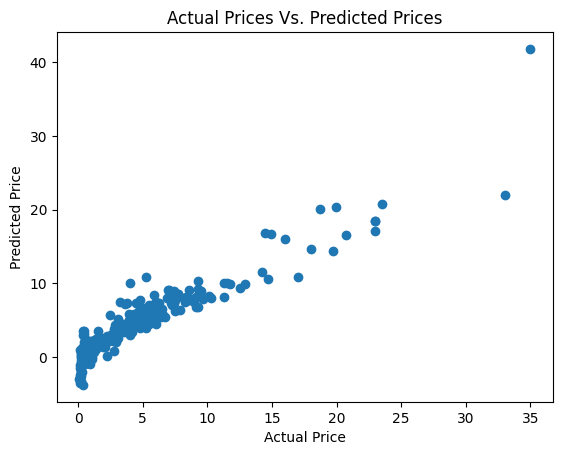

In [18]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()

In [19]:
# prediction on testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
error_score

0.8365766715027051